<h1 align="center">AtliQo Bank Credit Card Launch</h1>

# Problem Statement

AtliQo Bank, a new banking company wants to launch a credit card in the highly competitive Indian market.The company needed to identify the most promising target market segment and tailor its credit card offering to meet the specific needs and preferences of that segment.The objective is to make data-driven decisions regarding the target market segment and ensure the successful launch of the new credit card within that segment, enabling the banking company to gain a competitive edge in the Indian market.

<h2 align="center" style="color:purple">Phase 1: AtliQ0 Bank Credit Card Project</h2>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

<h1 style="color:green" align="center">Data Import<h1>

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
df_transact = pd.read_csv('Datasets/transactions.csv')

In [155]:
df_transact.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [156]:
df_cust = pd.read_csv('Datasets/customers.csv')

In [157]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [158]:
df_credit = pd.read_csv('Datasets/credit_profiles.csv')

In [159]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


<h1 style="color:green" align="center">Exploring Customers Table<h1>

In [160]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [161]:
df_cust.isnull().sum() #50Null Values

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

<h2 style="color:Black">1. Analyze Income Column<h2>

### Handle Null Values: Annual income

In [162]:
df_cust[df_cust.annual_income.isna()].head() #now we will fill the Na values with median annualincome of each occupation

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [163]:
occ_wise_inc_median = df_cust.groupby('occupation')['annual_income'].median()
occ_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [164]:
df_cust['annual_income'] = df_cust.apply(
    lambda row : occ_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],axis = 1)

In [165]:
df_cust.isnull().sum() #No null values

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [166]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


Previously records at location 14 and 82 had null annual income. Now we have a median value per occupation

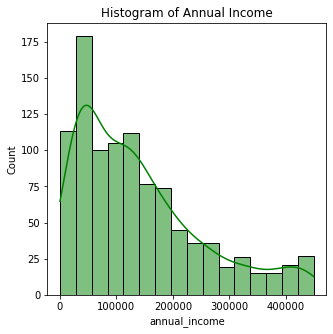

In [167]:
plt.figure(figsize = (5,5))
sns.histplot(df_cust['annual_income'],kde =True,color = 'green',label = 'Data')
plt.title('Histogram of Annual Income')
plt.show() #rightly skewed

In [168]:
df_cust.describe() #min value is 2 its an oulier company manager told that that annualincome below 100 is invalid data(outlier)

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [169]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [170]:
df_cust[df_cust.annual_income<100].shape

(10, 8)

### Outlier Treatment: Annual income

Above records (with <100$ income) are outliers. We have following options to treat them,

1. **Remove them**: After discussion with business manager, we decided not to remove them as these are valid customers and we want to include them in our analysis
1. **Replace them with mean or median** : Mean is sensitive to outliers. It is better to use median for income values
1. **Replace them with occupation wise median**: Income level may vary based on occupation. For example median income for data scientist can be different from a median income of a business owner. It is better to use occupation wise median income for replacement


In [171]:
df_cust['annual_income'] = df_cust.apply(
    lambda row : occ_wise_inc_median[row['occupation']] if row['annual_income'] < 100 else row['annual_income'],axis = 1)

In [172]:
df_cust.iloc[[31,262,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


Record at 31,262, and 316 location had annual income of < 100$. Now you can see it is replaced by a median income per occupation

In [173]:
df_cust[df_cust.annual_income<100] 

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


successfully manged outliers values

### Data Visualization: Annual Income


In [174]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [175]:
df_occupation_mean = df_cust.groupby('occupation').annual_income.mean().sort_values()

In [176]:
df_occupation_mean

occupation
Artist                  45309.236842
Consultant              60703.154639
Accountant              64123.562500
Freelancer              76327.508772
Fullstack Developer     78727.972973
Data Scientist         137021.266304
Business Owner         268447.368512
Name: annual_income, dtype: float64

In [177]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

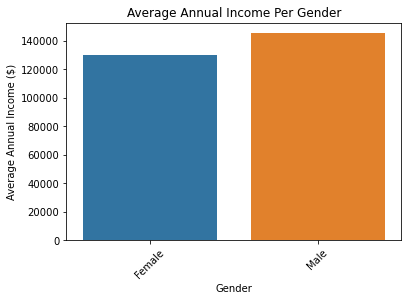

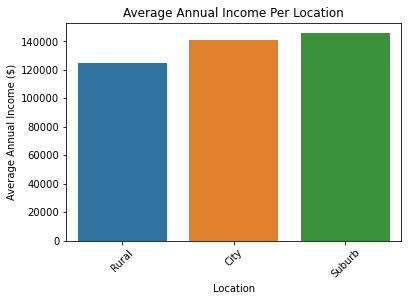

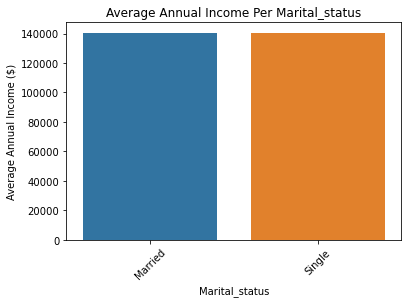

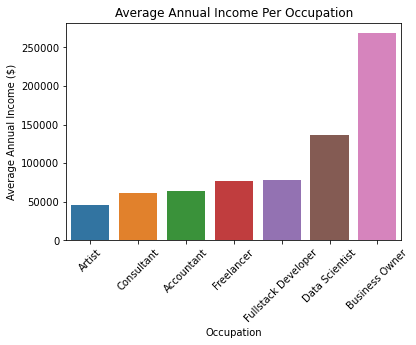

In [178]:
categories = ['gender','location','marital_status','occupation']

for col in categories:
    df_occupation_mean = df_cust.groupby(col).annual_income.mean().sort_values()
    sns.barplot(df_occupation_mean.index,df_occupation_mean.values,palette = 'tab10')
    plt.xticks(rotation = 45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()

<h2 style="color:Black">2. Analyze Age Column<h2>

### Handle Null Values: Age Column

First let us check if there are any NULL values in the Age column

In [179]:
df_cust.age.isnull().sum()

0

No null values are found in age column. 

In [180]:
df_cust.describe() #outliers in age

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


### Outlier Treatment: Age

Above we see that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

In [181]:
df_outliers = df_cust[(df_cust.age<15) | (df_cust.age>80)]

In [182]:
df_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [183]:
df_outliers.shape

(20, 8)

we cannot remove 20 rows as they are important. So to treat these outliers we will use median age for each of the occupation  

In [184]:
age_median = df_cust.groupby('occupation')['age'].median()

In [185]:
age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [186]:
df_cust['age'] = df_cust.apply(
    lambda row : age_median[row['occupation']] if (row['age'] <15) | (row['age'] >80) else row['age'] ,axis =1)

In [187]:
df_cust[(df_cust.age<15) | (df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [188]:
df_cust.iloc[[0,41]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,26.0,City,Artist,7621.0,Married


In [189]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


As you can see above, now we don't have any outliers left. min age is 18 and max is 64

### Data Visualization: Age Column

In [190]:
bin_edges = [17,25,48,65] 
bin_labels = ['18-25','26-48','49-65']
df_cust['age_group'] = pd.cut(df_cust['age'],bins=bin_edges,labels = bin_labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [191]:
age_group_pct = df_cust.age_group.value_counts(normalize =True) *100
age_group_pct

26-48    56.7
18-25    24.6
49-65    18.7
Name: age_group, dtype: float64

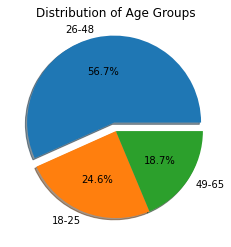

In [192]:
plt.pie(age_group_pct,labels=age_group_pct.index ,autopct = '%1.1f%%',explode = (0.1,0,0),shadow = True)
plt.title('Distribution of Age Groups')
plt.show()

<h2 style="color:Black">3. Analyze Gender and Location Distribution<h2>

In [193]:
#to create stack bar chart
df_cust.location.value_counts()

City      683
Suburb    232
Rural      85
Name: location, dtype: int64

In [194]:
df_cust.gender.value_counts()

Male      674
Female    326
Name: gender, dtype: int64

In [195]:
cus_location_gen =df_cust.groupby(['location','gender']).size().unstack() # unstack is used to convert pandas series to data frame

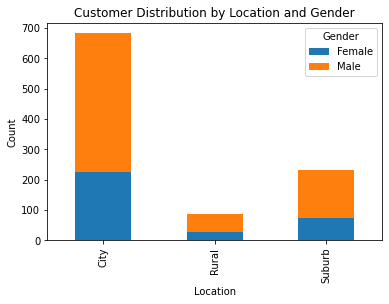

In [196]:
cus_location_gen.plot(kind='bar',stacked = True)
plt.title('Customer Distribution by Location and Gender')
plt.legend(title = "Gender")
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

<h1 style="color:green" align="center">Explore Credit Score Table<h1>

In [197]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [198]:
df_credit.shape

(1004, 6)

Credit table should have same records as customers table, so there are 4 extra records

In [199]:
df_credit.cust_id.nunique() #so some records have duplicates

1000

In [200]:
#lets print out duplicates
df_credit[df_credit.cust_id.duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [201]:
df_credit_clean = df_credit.drop_duplicates(subset = 'cust_id',keep= 'last')

In [202]:
df_credit_clean.shape

(1000, 6)

In [203]:
df_credit_clean[df_credit_clean.cust_id.duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


looks clean now after cleaning duplicates.

Next step would be to see if there are any null values

### Data Cleaning Step 2: Handle Null Values

In [204]:
df_credit_clean.isnull().sum() #Nullvalues are there

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [205]:
df_credit_clean[df_credit_clean.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


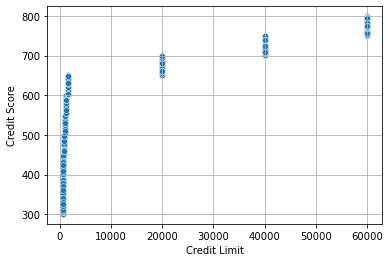

In [206]:
sns.scatterplot(x=df_credit_clean.credit_limit, y=df_credit.credit_score)
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.grid(True)  # Add gridlines
plt.show()

Here we can see clear relationship between credit score and credit limit. Where there are levels for example, upto 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [207]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_credit_clean['credit_score_range'] = pd.cut(df_credit_clean['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)


In [208]:
df_credit_clean.shape

(1000, 7)

In [209]:
mode_df = df_credit_clean.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df
#iloc because if 10 rows have 5 same other 5 also same so it will return only 1 if not used it will return 2

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [210]:
df_credit_clean2 = pd.merge(df_credit_clean,mode_df, on='credit_score_range', suffixes=('', '_mode'))

In [211]:
df_credit_clean2.shape

(1000, 8)

In [212]:
df_credit_clean2[df_credit_clean2.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
9,65,734,0.473715,13631.0,0.0,NaN,700-749,40000.0
10,84,733,0.525567,16663.0,1.0,NaN,700-749,40000.0
19,160,709,0.759795,18244.0,0.0,NaN,700-749,40000.0
20,168,737,0.489797,12421.0,2.0,NaN,700-749,40000.0
37,279,741,0.352932,10846.0,1.0,NaN,700-749,40000.0
...,...,...,...,...,...,...,...,...
944,758,783,0.801201,28920.0,3.0,NaN,750-799,60000.0
951,780,787,0.681978,24711.0,1.0,NaN,750-799,60000.0
962,850,787,0.293520,11195.0,3.0,NaN,750-799,60000.0
981,899,775,0.487290,21548.0,0.0,NaN,750-799,60000.0


Above we can simple replace NaN value in credit_limit column with credit_limit_mode value. This value indicates most frequently occuring credit limit for a given credit_score_range. Hence it can be used as a replacement value.

We will create a new copy of the dataframe so that we have reproducibility and access of the older dataframe in this notebook

In [213]:
df_cs_clean_3 = df_credit_clean2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace=True)
df_cs_clean_3.shape

(1000, 8)

### Data Cleaning Step 3: Handle Outliers: outstanding_debt


In [214]:
df_cs_clean_3.describe() 

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


Outliers are there as max outstanding debt is more than credit limit which is not possible

<function matplotlib.pyplot.show(close=None, block=None)>

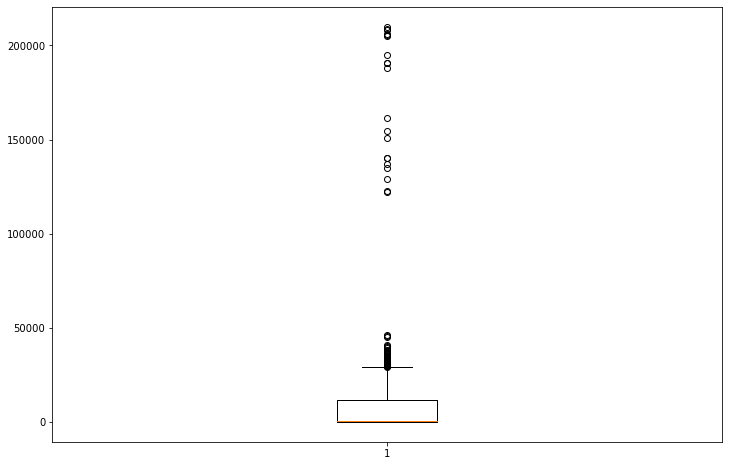

In [215]:
plt.figure(figsize=(12, 8))
plt.boxplot(df_cs_clean_3.outstanding_debt)
plt.show

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [216]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


We will replace these outliers with credit_limit. We can assume that there was some data processing error due to we got these high numbers and it is ok to replace them with a credit_limit

In [217]:
df_cs_clean_3['outstanding_debt'] = df_cs_clean_3.apply(
    lambda row: row['credit_limit'] if row['outstanding_debt'] > row['credit_limit'] else row['outstanding_debt'], axis=1)

In [218]:
df_cs_clean_3.iloc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,40000.0,2.0,40000.0,700-749,40000.0


In [219]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


Outliers managed!

### Data Exploration: Visualizing Correlation in Credit Score Table

In [220]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [221]:
df_merged = df_cust.merge(df_cs_clean_3,on='cust_id',how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [222]:
df_merged[['outstanding_debt','credit_limit']].corr() #strongly correlated

,outstanding_debt,credit_limit
outstanding_debt,1.000000,0.810581
credit_limit,0.810581,1.000000


Now we will caluclate the correlations between all the numeric columns using heatmap

In [223]:
numeric_columns = ['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']
correlation_matrix = df_merged[numeric_columns].corr()

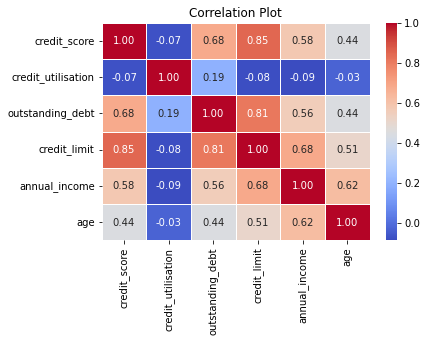

In [224]:
sns.heatmap(correlation_matrix,annot = True,fmt = '.2f',cmap = 'coolwarm', linewidths = 0.9)
plt.title('Correlation Plot')
plt.show()

You can see a high correlation between credit limit and credit score (~0.85)

Also credit limit and annual income has a high correlation.

This correlation table can be used for further analysis. It shows if one variable has relationship with the other variable

<h1 style="color:green" align="center">Transactions Table<h1>

In [225]:
df_transact.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [226]:
df_transact.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


### Data Cleaning Step 1: Handle NULL Values: platform column

In [227]:
df_transact.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

platform has a lot of null values. Let's check them further

In [228]:
df_transact[df_transact.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [229]:
df_transact.platform.value_counts()

Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: platform, dtype: int64

We know that Amazon is the platform that users use the most. but still we will see for each category which platform is used the most with the help of count plot

[]

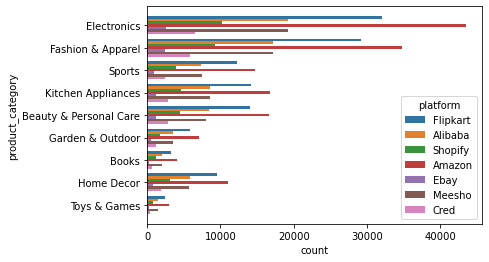

In [230]:
sns.countplot(y = 'product_category',hue = 'platform',data = df_transact)
plt.plot() #Amazon is the highestselling in each platform sowe will replace na values with this

In [231]:
df_transact.platform.fillna(df_transact.platform.mode()[0],inplace = True)

In [232]:
df_transact.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [233]:
df_transact.describe()#minimum transaction amount cannot be 0

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [234]:
df_transact_zero = df_transact[df_transact.tran_amount == 0]

In [235]:
df_transact_zero.shape

(4734, 7)

In [236]:
df_transact_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [237]:
df_transact_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [238]:
df_transact1= df_transact[(df_transact.platform == 'Amazon') & (df_transact.product_category == 'Electronics') & (df_transact.payment_type == 'Credit Card') ]

In [239]:
median_value =df_transact1[df_transact1.tran_amount > 0].tran_amount.median()
median_value

554.0

In [240]:
df_transact.tran_amount.replace(0,median_value,inplace = True)

In [241]:
df_transact.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

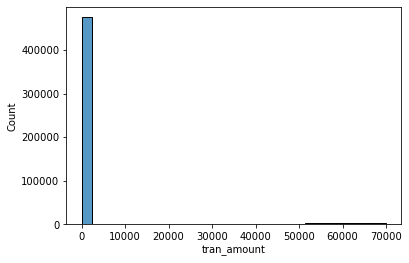

In [242]:
sns.histplot(df_transact.tran_amount,bins =30) #rightly skewed

<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

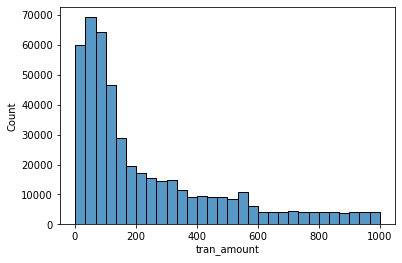

In [243]:
sns.histplot(df_transact[df_transact.tran_amount<10000].tran_amount,bins=30) #THIS IS BETTER AFTER FILTERING BASED ONABOVE GRAPH rightly skewed so lets apply IQR FOR OUTLIER MANAGEMENT

In [244]:
Q1,Q3 = df_transact.tran_amount.quantile([0.25,0.75])

In [245]:
IQR = Q3 - Q1
IQR

347.0

SO THE BUSINESS MANAGER TOLD TO USE 2 INSTEAD OF 1.5 FOR IQR

In [246]:
upper = Q3 + 2*IQR
lower = Q1 - 2*IQR
upper,lower

(1107.0, -628.0)

In [247]:
df_transact_outlier =df_transact[df_transact.tran_amount >= upper]

In [248]:
df_transact_outlier.shape #25000 is outliers so we have to deal with outliers not remove it

(25000, 7)

In [249]:
df_transact_outlier.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [250]:
df_transact.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [251]:
df_transact_normal = df_transact[df_transact.tran_amount <= upper]

In [252]:
category_mean = df_transact_normal.groupby('product_category')['tran_amount'].mean()
category_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [253]:
df_transact['tran_amount'] = df_transact.apply(
    lambda row : category_mean[row['product_category']] if row['tran_amount'] > upper else row['tran_amount'] ,axis=1)

In [254]:
df_transact.iloc[[26]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card


In [255]:
df_transact.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

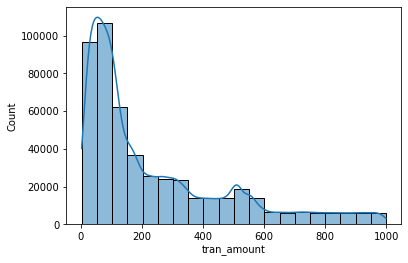

In [256]:
sns.histplot(df_transact.tran_amount,kde = True, bins =20)

Without removing outliers we managed it and now the graph is good (rightly skewed)

In [257]:
df_transact.shape

(500000, 7)

### Data Visualization: Payment Type Distribution

In [258]:
df_transact.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


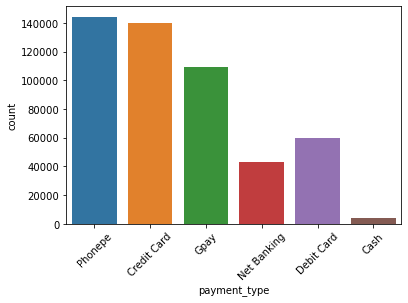

In [259]:
sns.countplot(x='payment_type', data=df_transact)
plt.xticks(rotation=45)
plt.show()

In [260]:
df_merged_2 = pd.merge(df_cust,df_transact,on='cust_id',how ='inner')
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


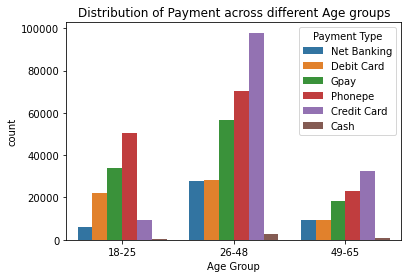

In [261]:
sns.countplot(x= 'age_group',hue = 'payment_type', data =df_merged_2)
plt.title('Distribution of Payment across different Age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.legend(title= 'Payment Type',loc = 'upper right')
plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

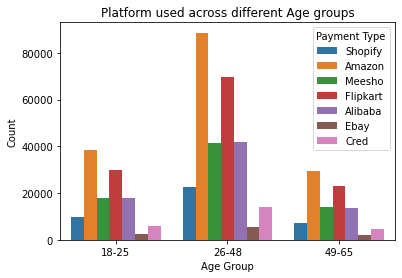

In [262]:
sns.countplot(x= 'age_group',hue = 'platform', data =df_merged_2)
plt.title('Platform used across different Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title= 'Payment Type',loc = 'upper right')
plt.show()

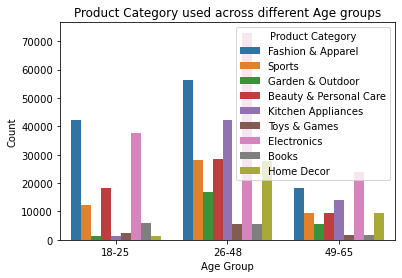

In [263]:
sns.countplot(x= 'age_group',hue = 'product_category', data =df_merged_2)
plt.title('Product Category used across different Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title= 'Product Category',loc = 'upper right')
plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

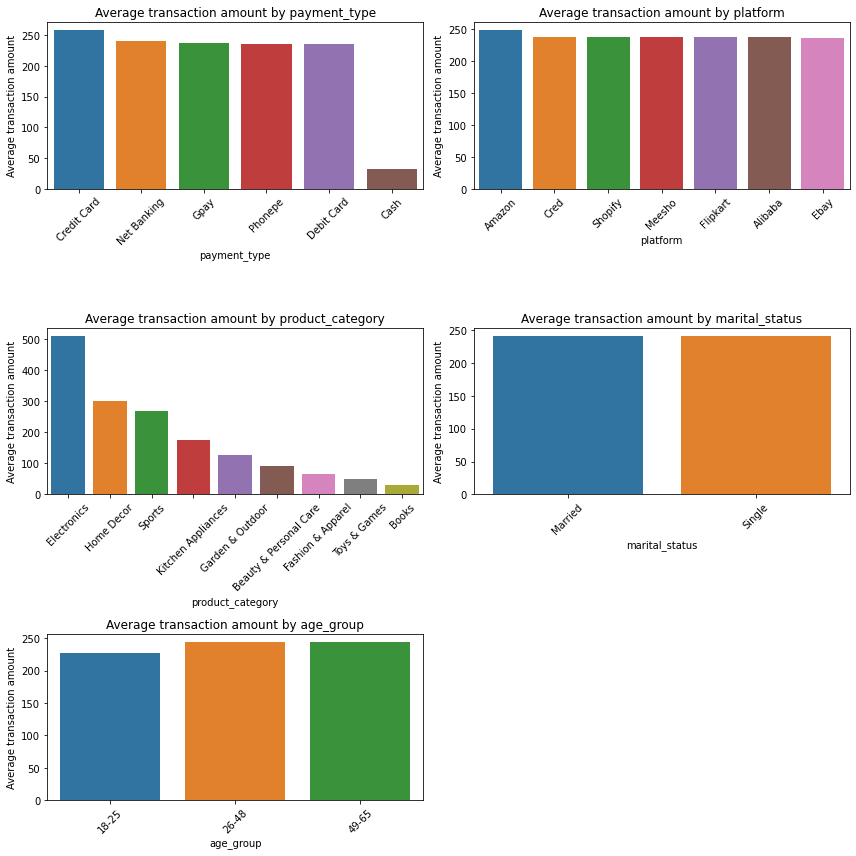

In [264]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [265]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


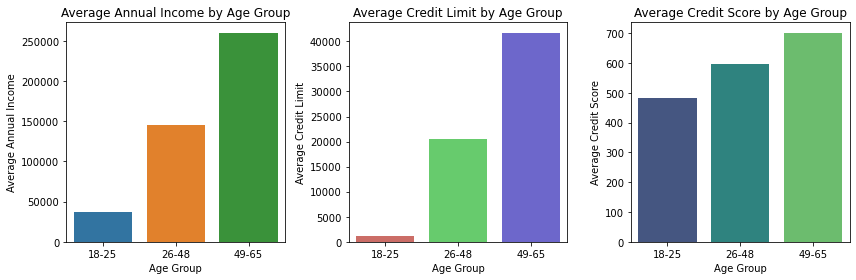

In [266]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:green">Finalize Target Market For a Trial Credit Card Launch<h2>

#### Targeting Untapped market

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care

<h2 align="center" style="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

### Business Analysis and launch of AB testing: Targeting Untapped Market ( 18 - 25 age group)

In [267]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [268]:
alpha = 0.05 # 5% significance
power = 0.8 #statistical power
effect_size = 0.2

sms.tt_ind_solve_power(
effect_size = effect_size,
alpha=alpha,
power = power,
ratio = 1,
alternative = 'two-sided')  #for finding the sample size with the parameters defined

393.4056989990322

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with business to find out which sample size would be optimal

But the product manager wants less number of people as there are some budget constraints as well

In [269]:
alpha = 0.05 # 5% significance
power = 0.8 #statistical power

effect_sizes = [0.2,0.3,0.4,0.5,1]
for effect in effect_sizes:
    sample_size = sms.tt_ind_solve_power(
        effect_size=effect,
        alpha=alpha,
        power=power,
        ratio=1,
        alternative='two-sided'
    )
    print(f"Effect Size {effect} has {sample_size:.2f} customers")
    

Effect Size 0.2 has 393.41 customers
Effect Size 0.3 has 175.38 customers
Effect Size 0.4 has 99.08 customers
Effect Size 0.5 has 63.77 customers
Effect Size 1 has 16.71 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

## (2) Post-Campaign

## Two Sample Z Test for Our Hypothesis Testing

In [270]:
df_post = pd.read_csv('Datasets/avg_transactions_after_campaign.csv')

In [271]:
df_post.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [272]:
df_post.shape

(62, 3)

<AxesSubplot:xlabel='control_group_avg_tran', ylabel='Count'>

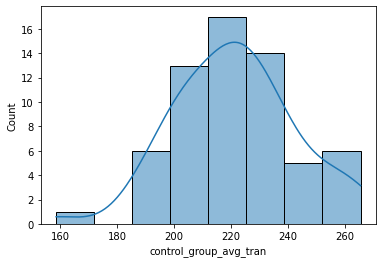

In [273]:
sns.histplot(df_post.control_group_avg_tran ,kde=True)

<AxesSubplot:xlabel='test_group_avg_tran', ylabel='Count'>

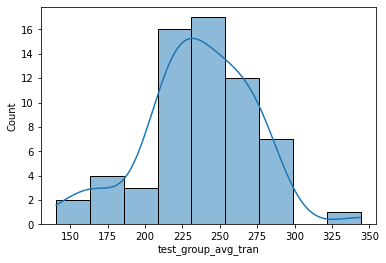

In [274]:
sns.histplot(df_post.test_group_avg_tran ,kde=True)

Definiing hypothesis : 

1.)Null Hypothesis: our old credit card has more transactions and performing well(meanof c > mean of t).

2.)Alternate hypothesis : our new credit card has more transactions and performing well ( mean of t > mean of c),


In [275]:
#for control group 
control_mean1 = df_post["control_group_avg_tran"].mean()
control_std = df_post.control_group_avg_tran.std()
shape = df_post.shape[0]
control_mean1,control_std,shape


(221.1751612903226, 21.359192112027014, 62)

In [276]:
#for test_group
test_mean = df_post.test_group_avg_tran.mean()
test_std = df_post.test_group_avg_tran.std()

test_mean,test_std


(235.98354838709682, 36.65808210918637)

In [277]:
a = control_std**2/ shape
b = test_std **2/ shape
a,b

(7.358307865781887, 21.67443522457822)

In [278]:
z_score =( test_mean - control_mean1) / np.sqrt(a+b)

In [279]:
z_score

2.748297374569119

In [280]:
alpha = 0.05
z_critical = st.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [281]:
z_score>z_critical # null hypothesis is rejected

True

The analysis validated the new credit card's performance, and can now be confidently introduced to the market.